In [6]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()
def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

In [7]:
dim = 50
num_layer = 20
def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [8]:
raw_data = np.genfromtxt('C:/Users/jeffe/Desktop/Summer research/DFNN/Data_r_freq.txt')
all_d = np.zeros((len(raw_data), 2))
#calculate transmission
for i in range(len(raw_data)):
    all_d[i, 0] = raw_data[i, 0]
    all_d[i, 1] = raw_data[i, 2]**2 + raw_data[i, 3]**2

data_size = len(all_d)
x = np.reshape(all_d[:, -1], (41, 50))
y = np.reshape(all_d[:, 0], (data_size, 1))
y_processed = []
for i in range(0, len(y), 50):
    y_processed.append(y[i])
y_processed = np.array(y_processed)
shuffled_data = np.append(y_processed, x, axis = 1)
np.random.shuffle(shuffled_data)
x = np.reshape(shuffled_data[:, 1:], (41, 50))
y_processed = np.reshape(shuffled_data[:, 0], (41, 1))
keras.utils.normalize(x)
#keras.utils.normalize(y_processed)

train_x = x[0:30, :]
train_y = y_processed[0:30]
test_x = x[31:41, :]
test_y = y_processed[31:41]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 1s - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0051 - val_acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0048 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0051 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0047 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0044 - acc: 0.0000e+00 - val_loss: 0.0056 - val_acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0042 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0039 - acc: 0.0000e+00 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 10

Epoch 82/500
 - 0s - loss: 7.5794e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 83/500
 - 0s - loss: 7.5808e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 84/500
 - 0s - loss: 7.4883e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 85/500
 - 0s - loss: 7.3142e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 86/500
 - 0s - loss: 7.2620e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 87/500
 - 0s - loss: 7.2599e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 88/500
 - 0s - loss: 7.0096e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 89/500
 - 0s - loss: 7.3714e-04 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 90/500
 - 0s - loss: 6.8244e-04 - acc: 0.0000e+00 - val_loss: 0.0022 - val_acc: 0.0000e+00
Epoch 91/500
 - 0s - loss: 6.7381e-04 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 92/500
 - 0s - loss: 6.5

Epoch 166/500
 - 0s - loss: 3.2833e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 167/500
 - 0s - loss: 3.0514e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 168/500
 - 0s - loss: 3.1561e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 169/500
 - 0s - loss: 2.8767e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 170/500
 - 0s - loss: 2.8642e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 171/500
 - 0s - loss: 2.8262e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 172/500
 - 0s - loss: 2.9677e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 173/500
 - 0s - loss: 3.3923e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 174/500
 - 0s - loss: 3.0327e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 175/500
 - 0s - loss: 2.9108e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 176/500
 - 0s 

Epoch 250/500
 - 0s - loss: 1.6123e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 251/500
 - 0s - loss: 1.5862e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 252/500
 - 0s - loss: 1.7731e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 253/500
 - 0s - loss: 1.5307e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 254/500
 - 0s - loss: 1.7092e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 255/500
 - 0s - loss: 1.5271e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 256/500
 - 0s - loss: 1.5355e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 257/500
 - 0s - loss: 1.5233e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 258/500
 - 0s - loss: 1.6169e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 259/500
 - 0s - loss: 1.5613e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 260/500
 - 0s 

Epoch 334/500
 - 0s - loss: 1.1893e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 335/500
 - 0s - loss: 1.1843e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 336/500
 - 0s - loss: 1.4710e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 337/500
 - 0s - loss: 1.1407e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 338/500
 - 0s - loss: 1.2694e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 339/500
 - 0s - loss: 1.2406e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 340/500
 - 0s - loss: 1.3863e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 341/500
 - 0s - loss: 1.4524e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 342/500
 - 0s - loss: 1.1656e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 343/500
 - 0s - loss: 1.3442e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 344/500
 - 0s 

Epoch 418/500
 - 0s - loss: 1.3538e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 419/500
 - 0s - loss: 1.3864e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 420/500
 - 0s - loss: 1.4486e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 421/500
 - 0s - loss: 1.2145e-04 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 422/500
 - 0s - loss: 1.3539e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 423/500
 - 0s - loss: 1.1450e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 424/500
 - 0s - loss: 1.2015e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 425/500
 - 0s - loss: 1.1851e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 426/500
 - 0s - loss: 1.1146e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 427/500
 - 0s - loss: 1.2862e-04 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 428/500
 - 0s 

<IPython.core.display.Javascript object>


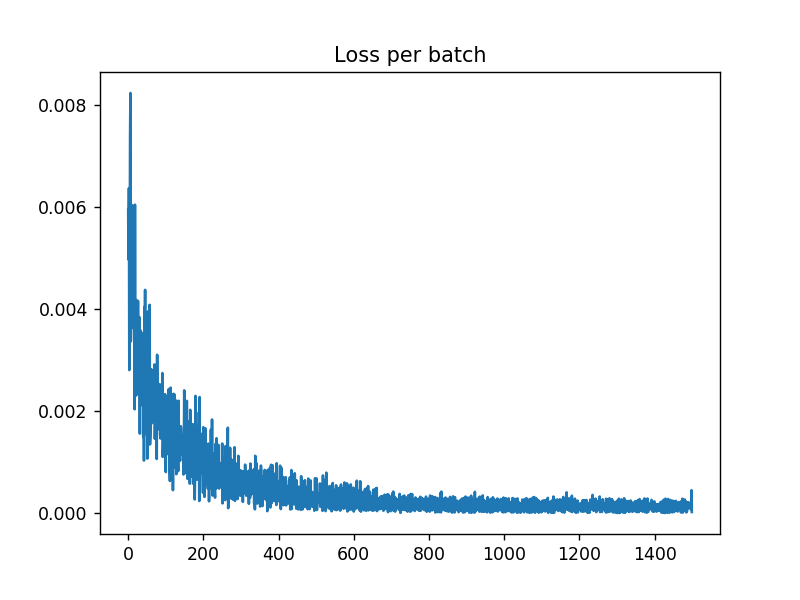

In [9]:
model = init_model()
history = LossHistory()
model.fit(train_x, train_y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_y), verbose=2)
score = model.evaluate(test_x, test_y, batch_size=20)
print(score)
plot_losses(history.losses)

In [10]:
print("Training data accuracy")
for i in range(len(train_x)):
    print("True R_norm: " + str(train_y[i]) + "\tPredicted R_norm: " + str(model.predict(np.reshape(train_x[i], (1, 50)))))

Training data accuracy
True R_norm: [0.19166667]	Predicted R_norm: [[0.18794352]]
True R_norm: [0.21666667]	Predicted R_norm: [[0.20680243]]
True R_norm: [0.15]	Predicted R_norm: [[0.12514102]]
True R_norm: [0.26666667]	Predicted R_norm: [[0.2562393]]
True R_norm: [0.13333333]	Predicted R_norm: [[0.12243262]]
True R_norm: [0.30833333]	Predicted R_norm: [[0.30741537]]
True R_norm: [0.40833333]	Predicted R_norm: [[0.4085926]]
True R_norm: [0.41666667]	Predicted R_norm: [[0.415312]]
True R_norm: [0.35]	Predicted R_norm: [[0.34162933]]
True R_norm: [0.33333333]	Predicted R_norm: [[0.33194792]]
True R_norm: [0.4]	Predicted R_norm: [[0.39643136]]
True R_norm: [0.16666667]	Predicted R_norm: [[0.13488804]]
True R_norm: [0.24166667]	Predicted R_norm: [[0.23102805]]
True R_norm: [0.11666667]	Predicted R_norm: [[0.12137394]]
True R_norm: [0.20833333]	Predicted R_norm: [[0.20246024]]
True R_norm: [0.375]	Predicted R_norm: [[0.37619925]]
True R_norm: [0.23333333]	Predicted R_norm: [[0.21814117]]
Tr

In [11]:
print("Testing data accuracy")
for i in range(len(test_x)):
    print("True R_norm: " + str(test_y[i]) + "\tPredicted R_norm: " + str(model.predict(np.reshape(test_x[i], (1, 50)))))

Testing data accuracy
True R_norm: [0.09166667]	Predicted R_norm: [[0.12090183]]
True R_norm: [0.14166667]	Predicted R_norm: [[0.12361114]]
True R_norm: [0.39166667]	Predicted R_norm: [[0.32165343]]
True R_norm: [0.18333333]	Predicted R_norm: [[0.20410475]]
True R_norm: [0.31666667]	Predicted R_norm: [[0.288172]]
True R_norm: [0.2]	Predicted R_norm: [[0.13358353]]
True R_norm: [0.175]	Predicted R_norm: [[0.17986225]]
True R_norm: [0.1]	Predicted R_norm: [[0.12096351]]
True R_norm: [0.34166667]	Predicted R_norm: [[0.27955902]]
True R_norm: [0.29166667]	Predicted R_norm: [[0.29767263]]


## So far the best model

In [ ]:
def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

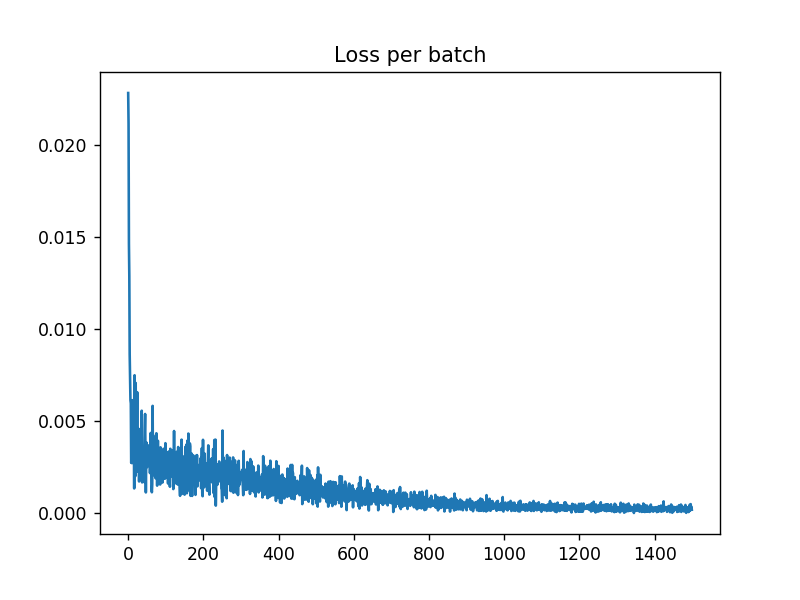